SuperMarket Sales Data Analysis

In [1]:
#Import the libraries 

#Save our Project
import jovian
#Manipulate file
import os

# Numerical/Dataframe libraries
import pandas as pd 
import numpy as np

# Vizualizing NaN values
import missingno as msno

#Geolocalisation
import folium

#Vizualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

Reading The DATASET

In [2]:

supermarket_df= pd.read_csv('E:/AMotefaker/ABC/Data Analyst/Sales Data Analysis/SuperMarket Sales Data Analysis/supermarket_sales.csv')

In [3]:
supermarket_df.head(10).style.background_gradient(cmap='GnBu')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.690000,7,26.141500,548.971500,1/5/2019,13:08,Ewallet,522.830000,4.761905,26.141500,9.100000
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.280000,5,3.820000,80.220000,3/8/2019,10:29,Cash,76.400000,4.761905,3.820000,9.600000
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.330000,7,16.215500,340.525500,3/3/2019,13:23,Credit card,324.310000,4.761905,16.215500,7.400000
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.220000,8,23.288000,489.048000,1/27/2019,20:33,Ewallet,465.760000,4.761905,23.288000,8.400000
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.310000,7,30.208500,634.378500,2/8/2019,10:37,Ewallet,604.170000,4.761905,30.208500,5.300000
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.390000,7,29.886500,627.616500,3/25/2019,18:30,Ewallet,597.730000,4.761905,29.886500,4.100000
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.840000,6,20.652000,433.692000,2/25/2019,14:36,Ewallet,413.040000,4.761905,20.652000,5.800000
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.560000,10,36.780000,772.380000,2/24/2019,11:38,Ewallet,735.600000,4.761905,36.780000,8.000000
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.260000,2,3.626000,76.146000,1/10/2019,17:15,Credit card,72.520000,4.761905,3.626000,7.200000
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.840000,3,8.226000,172.746000,2/20/2019,13:27,Credit card,164.520000,4.761905,8.226000,5.900000


Data Preprocessing

In [4]:
shape=supermarket_df.shape
print(f'The dataset contains {shape[0]} rows and {shape[1]} columns')

The dataset contains 1000 rows and 17 columns


In [5]:
# Display the number of parameters
supermarket_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
#Chech the Nan values
supermarket_df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

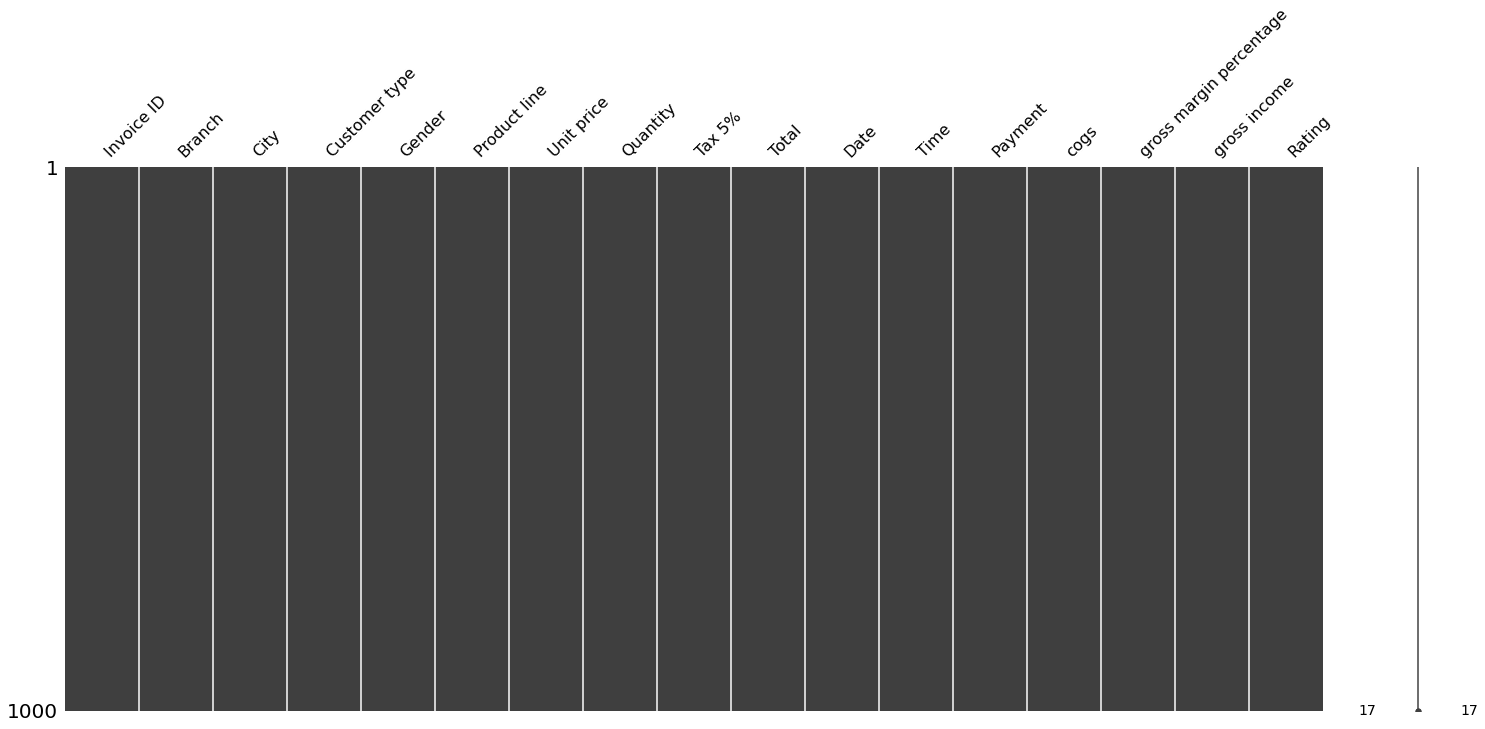

In [8]:
#Visualize the nan values in each columns
msno.matrix(supermarket_df);

In [9]:
#Check the dype of each columns
supermarket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Convert the date and time columns into date/time dtypes

In [10]:
# modified_df=supermarket_df.copy()

# Convert date columns into date time 
supermarket_df.Date = pd.to_datetime(supermarket_df.Date)
#Add a month,day and weekday columns
supermarket_df['month']=supermarket_df.Date.dt.month
supermarket_df['day']=supermarket_df.Date.dt.day
supermarket_df['weekday']=supermarket_df.Date.dt.day_name()
#Add a hour and minute columns 
supermarket_df['hour']=supermarket_df.Time.str[0:2]
supermarket_df['minute']=supermarket_df.Time.str[3:5]
#Make it int values
supermarket_df['hour']=pd.to_numeric(supermarket_df['hour'])
supermarket_df['minute']=pd.to_numeric(supermarket_df['minute'])

In [11]:
supermarket_df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
month                               int64
day                                 int64
weekday                            object
hour                                int64
minute                              int64
dtype: object

In [12]:
supermarket_df.describe().style.background_gradient(cmap='BuPu')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,month,day,hour,minute
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.587380,4.761905,15.379369,6.972700,1.993000,15.256000,14.910000,30.098000
std,26.494628,2.923431,11.708825,245.885335,234.176510,0.000000,11.708825,1.718580,0.835254,8.693563,3.186857,16.880680
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000,1.000000,1.000000,10.000000,0.000000
25%,32.875000,3.000000,5.924875,124.422375,118.497500,4.761905,5.924875,5.500000,1.000000,8.000000,12.000000,16.000000
50%,55.230000,5.000000,12.088000,253.848000,241.760000,4.761905,12.088000,7.000000,2.000000,15.000000,15.000000,30.000000
75%,77.935000,8.000000,22.445250,471.350250,448.905000,4.761905,22.445250,8.500000,3.000000,23.000000,18.000000,44.000000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000,3.000000,31.000000,20.000000,59.000000


#### Exploratory Data Analysis

In [13]:
#Matplotlib config
sns.set_style('darkgrid')

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12,9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##### City

In [14]:
supermarket_df.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [19]:
cities = pd.DataFrame({'city': ['Yangon', 'Naypyitaw', 'Mandalay'],
                       'Latitude': [16.8409,19.7633,21.9588],
                       'Longitude' : [96.1735, 96.0785, 96.0891]})

market_map = folium.Map(location = [21.9162,95.9560], zoom_start = 5, tiles = 'CartoDB Positron', control_scale = True)

plt.figure(figsize=(800,600));

for (i, j) in cities.iterrows():
  folium.Marker(location = [j.loc['Latitude'], j.loc['Longitude']], popup = j.loc['city'],tooltip = 'click',
                icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(market_map)

#market_map - Delete # to see the map 

<Figure size 57600x43200 with 0 Axes>

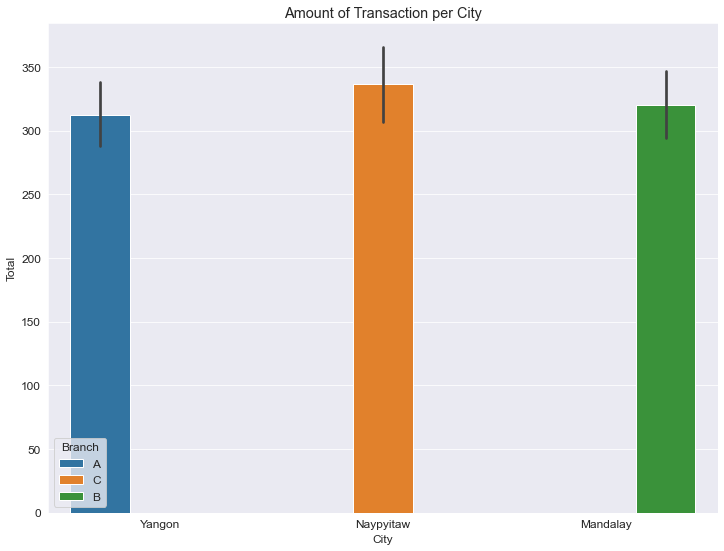

In [20]:
# supermarket_df.groupby('City').count()
plt.title('Amount of Transaction per City')
sns.barplot(x='City',y='Total',data=supermarket_df,hue='Branch');

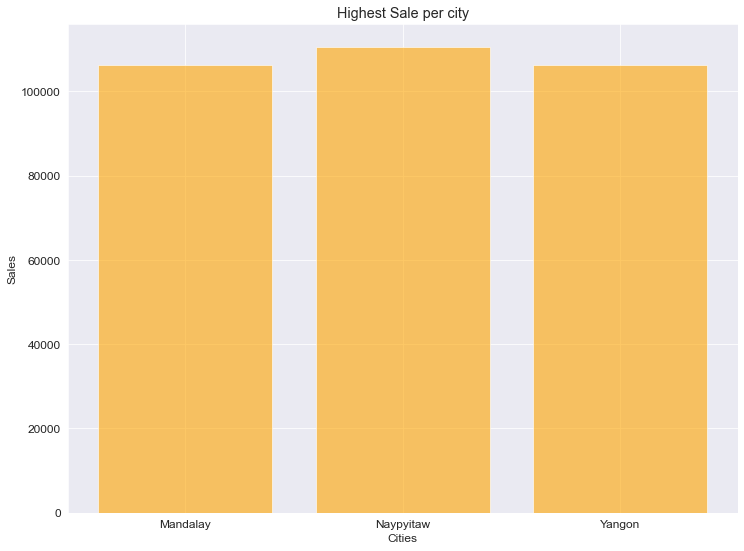

In [21]:
#Parameter for plotting 
sale=supermarket_df.groupby('City').sum()['Total'] #Y-values
cities=[city for city, supermarket_df in supermarket_df.groupby('City')] #X-values

# Plot
plt.bar(cities,sale,color='orange',alpha=.6)
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.title('Highest Sale per city')
plt.show()

##### Month

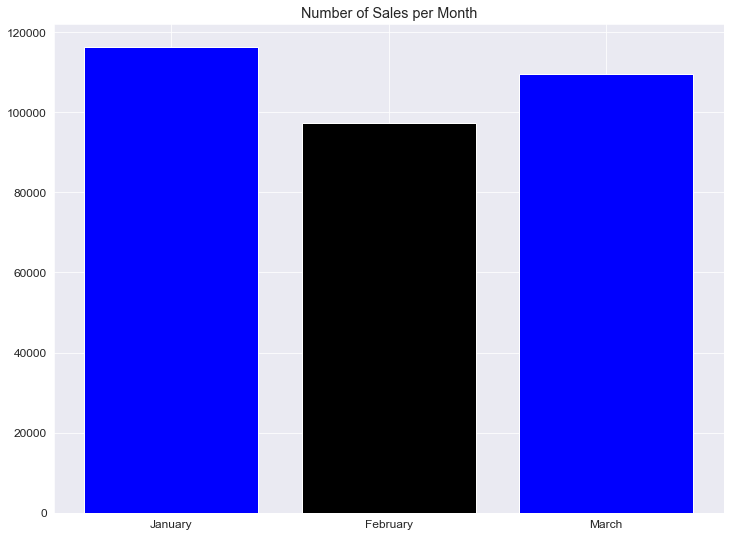

In [22]:
#Parameters for plotting 
sale=supermarket_df.groupby('month').sum()['Total']
month=['January','February','March']
c=['b','k','b']
#Plot
plt.figure(figsize=(12,9))
plt.bar(month,sale,color=c)
plt.title('Number of Sales per Month')
plt.show()
# print(sale)

##### Quantity

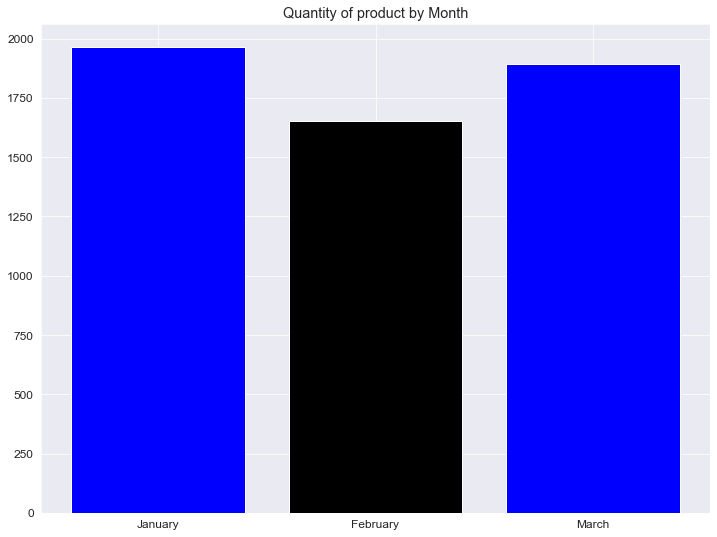

In [23]:
#Y-axis
quantity=supermarket_df.groupby('month').sum()['Quantity']

#Plot
plt.title('Quantity of product by Month')
plt.bar(month,quantity,color=c)
plt.show()

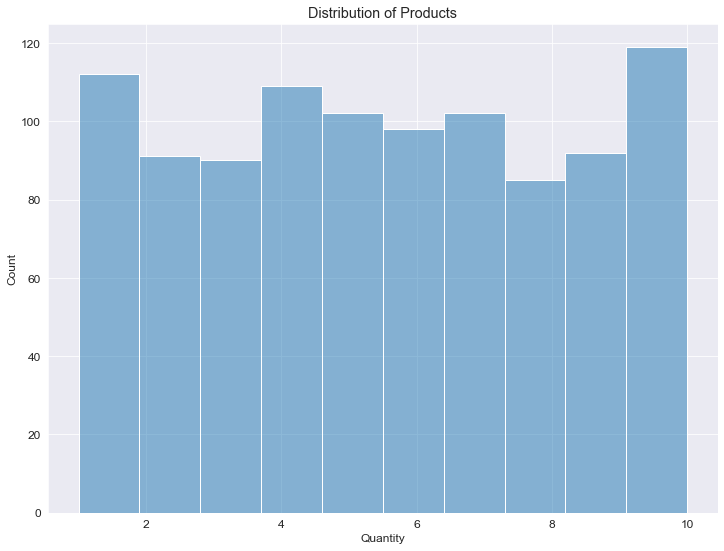

In [24]:
#Plot an histogram
plt.title('Distribution of Products')
sns.histplot(supermarket_df.Quantity,alpha=0.5, bins=10);

#####  Payment

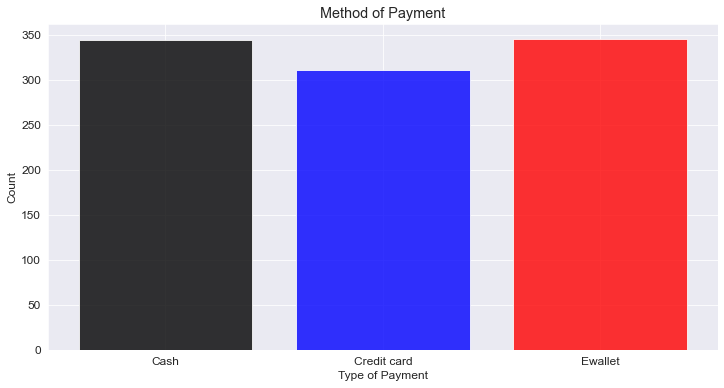

In [25]:
# Parameters for plotting
method=supermarket_df.groupby('Payment').count()['Total']
payment=['Cash','Credit card','Ewallet']
c=['k','b','r']
# Plot 
plt.figure(figsize=(12,6))
plt.bar(payment,method,color=c,alpha=0.8)
plt.xlabel('Type of Payment')
plt.ylabel('Count')
plt.title('Method of Payment')
plt.show()